## Exercise 02 : Bar

In [55]:
import pandas as pd
import sqlite3

In [56]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [57]:
query = """
        select timestamp from checker
        where uid like 'user_%'
        """

df = pd.read_sql(query, conn, parse_dates='timestamp')
df['daytime'] = pd.cut(df['timestamp'].dt.hour, bins=[-1, 4, 10, 17, 24], labels=['night', 'morning', 'afternoon', 'evening'])

df

,timestamp,daytime
0,2020-04-17 05:19:02.744528,morning
1,2020-04-17 05:22:35.249331,morning
2,2020-04-17 05:22:45.549397,morning
3,2020-04-17 05:34:14.691200,morning
4,2020-04-17 05:34:24.422370,morning
...,...,...
3202,2020-05-21 20:19:06.872761,evening
3203,2020-05-21 20:22:41.785725,evening
3204,2020-05-21 20:22:41.877806,evening
3205,2020-05-21 20:37:00.129678,evening


In [58]:
df = df.groupby(df['timestamp'].dt.date)['daytime'].value_counts().unstack(1)
df.index.name = 'date'
df

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,40,28
2020-04-19,2,11,9,11
2020-04-20,0,0,15,10
2020-04-21,0,0,9,16
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,2,12,2
2020-04-25,1,21,48,34


<Axes: title={'center': 'Commits per day'}, xlabel='date'>

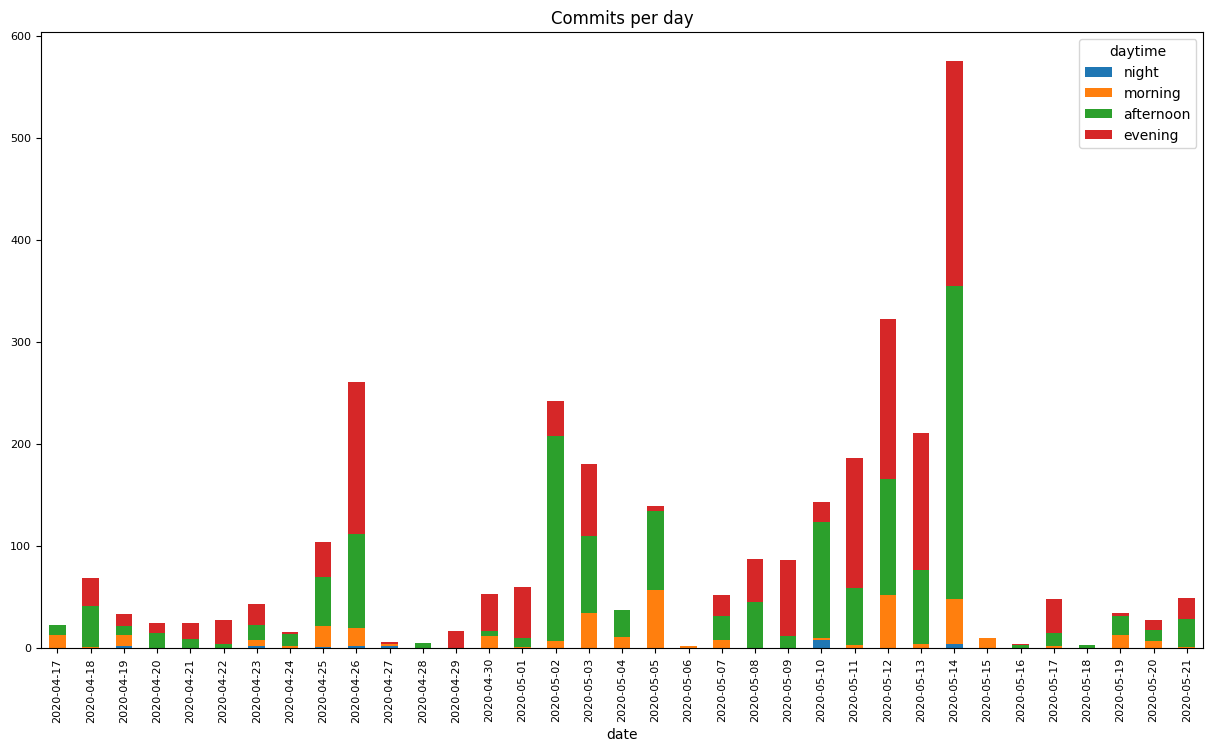

In [59]:
df.plot(kind='bar', stacked='True', figsize=(15, 8), fontsize=8, title='Commits per day')

When do our users usually commit the labs: in the night, morning, afternoon,
or evening?”, the answer is the two most common periods

In [60]:
df.sum()

daytime
night          21
morning       344
afternoon    1473
evening      1369
dtype: int64

1. afternoon
2. evening

Which day has:
- the most number of commits
- and at the same time, the number of commits in the evening is higher than in the afternoon?

In [65]:
print(df[df['evening'] > df['afternoon']].sum(axis=1).idxmax())

2020-05-12


In [ ]:
conn.close()